In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from io import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image  
import pydotplus

In [2]:
data = pd.read_csv('.\\student-mat.csv')
data.shape

(395, 33)

In [3]:
data.isnull().values.any()

False

In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [7]:
data['G3H'] = (data['G3'])

In [8]:
def define_G3H(df):

    G3H = []

    for row in df['G3H']:

        if row >= (0.9 * df['G3H'].max()):
            G3H.append('A')

        elif row >= (0.8 * df['G3H'].max()):
            G3H.append('B')

        elif row >= (0.7 * df['G3H'].max()):
            G3H.append('C')  

        elif row >= (0.6 * df['G3H'].max()):
            G3H.append('D')

        elif row >= (0.5 * df['G3H'].max()):
            G3H.append('E') 

        elif row < (0.5 * df['G3H'].max()):
            G3H.append('F')  
                     
    print(type(G3H))
    df['G3H'] = G3H
    return df

data = define_G3H(data)

<class 'list'>


In [9]:
data['G1H'] = (data['G1'])

In [10]:
def define_G1H(df):

    G1H = []

    for row in df['G1']:

        if row >= (0.9 * df['G1H'].max()):
            G1H.append('A')

        elif row >= (0.8 * df['G1H'].max()):
            G1H.append('B')

        elif row >= (0.7 * df['G1H'].max()):
            G1H.append('C')  

        elif row >= (0.6 * df['G1H'].max()):
            G1H.append('D')

        elif row >= (0.5 * df['G1H'].max()):
            G1H.append('E') 

        elif row < (0.5 * df['G1H'].max()):
            G1H.append('F')  
                     
    print(type(G1H))
    df['G1H'] = G1H
    return df

In [11]:
data = define_G1H(data)
data.head()

<class 'list'>


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G3H,G1H
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,F,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,F,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,E,F
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,C,C
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,E,F


In [12]:
#gereksiz buldugum datalarin cikartilmasi
data.drop(["school","age","famsize","Pstatus","reason","traveltime","failures","activities","higher","romantic","famrel","freetime","goout","Dalc","Walc","health","absences"], axis=1, inplace=True)

In [13]:
#1 ve 0 a donusturulmesi
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)
data['famsup'] = data['famsup'].map(d)
data['paid'] = data['paid'].map(d)
data['nursery'] = data['nursery'].map(d)
data['internet'] = data['internet'].map(d)

In [14]:
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)

d = {'U': 1, 'R': 0}
data['address'] = data['address'].map(d)

d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data['Mjob'] = data['Mjob'].map(d)
data['Fjob'] = data['Fjob'].map(d)

d = {'mother': 0, 'father': 1, 'other': 2}
data['guardian'] = data['guardian'].map(d)

d = {'F': 0,'E': 1,'D': 2,'C': 3, 'B': 4, 'A': 5}
data['G3H'] = data['G3H'].map(d)

d = {'F': 0,'E': 1,'D': 2,'C': 3, 'B': 4, 'A': 5}
data['G1H'] = data['G1H'].map(d)

In [15]:
data.nunique()

sex           2
address       2
Medu          5
Fedu          5
Mjob          5
Fjob          5
guardian      3
studytime     4
schoolsup     2
famsup        2
paid          2
nursery       2
internet      2
G1           17
G2           17
G3           18
G3H           6
G1H           6
dtype: int64

In [16]:
student_features = data.columns.tolist()
student_features.remove('G3H')
student_features.remove('G2')
student_features.remove('G1H')
student_features.remove('G3') 
print('-------')
print(student_features)
print('-------')

-------
['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'studytime', 'schoolsup', 'famsup', 'paid', 'nursery', 'internet', 'G1']
-------


In [17]:
X = data[student_features].copy()
X.columns

Index(['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian',
       'studytime', 'schoolsup', 'famsup', 'paid', 'nursery', 'internet',
       'G1'],
      dtype='object')

In [18]:
y=data[['G3H']].copy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
grade_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=0)
grade_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=14, random_state=0)

In [21]:
predictions = grade_classifier.predict(X_test)

In [22]:
print(X_test)
type(X_test)

     sex  address  Medu  Fedu  Mjob  Fjob  guardian  studytime  schoolsup  \
78     0        1     2     1     4     4         0          1          1   
371    0        0     1     2     3     2         1          1          0   
248    0        0     3     3     4     2         0          2          0   
55     1        1     2     1     4     4         0          2          0   
390    0        1     2     2     2     2         2          2          0   
..   ...      ...   ...   ...   ...   ...       ...        ...        ...   
281    0        1     3     2     0     2         0          1          0   
245    0        1     2     1     4     4         0          1          0   
250    0        1     3     2     2     4         0          1          0   
218    1        1     2     3     3     4         1          1          0   
109    1        1     4     4     1     1         0          3          0   

     famsup  paid  nursery  internet  G1  
78        1     0        1      

pandas.core.frame.DataFrame

In [23]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.6302521008403361

In [24]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(predictions)

[0 2 0 0 0 2 5 0 0 1 2 0 2 1 4 1 0 1 4 0 2 2 2 0 0 5 1 0 4 1 0 0 3 2 0 0 0
 2 2 0 0 0 2 0 5 1 1 4 0 5 2 2 0 0 0 0 2 0 4 5 1 0 0 0 0 2 0 0 0 3 0 0 3 5
 2 0 0 3 0 2 2 0 0 0 0 2 0 2 4 0 2 0 2 1 0 0 0 5 5 2 2 2 0 0 1 0 0 0 1 0 0
 0 0 0 1 5 0 0 2]


In [25]:

#print(y_test)

In [26]:
#print(y)

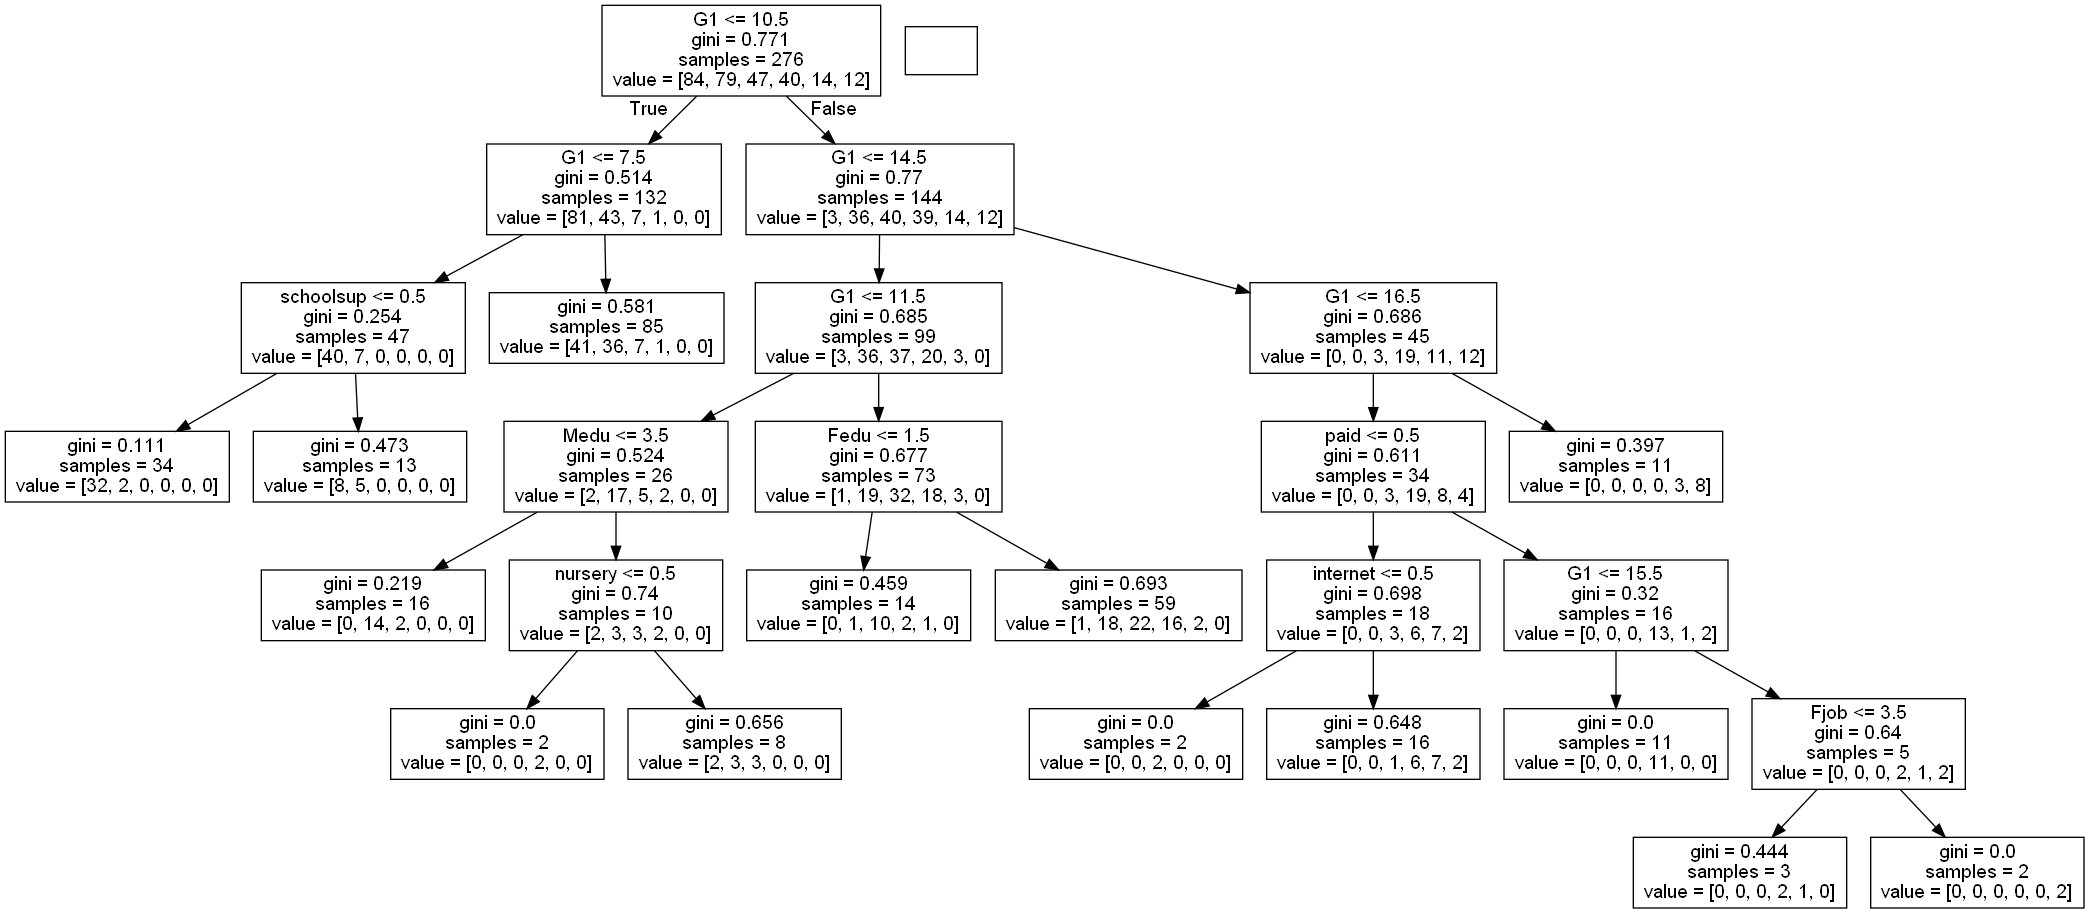

In [27]:
dot_data = StringIO()
tree.export_graphviz(grade_classifier, out_file=dot_data,  
feature_names=student_features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())